# Stock market Analysis

In this project, we will be analysis stock data for a few car companies from Jan-1 2012 to Jan-1 2017.


In [171]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Getting the Data

In [172]:
# Import the datasets.
ford = pd.read_csv("Ford_stock.csv", parse_dates=True, index_col='Date')
gm = pd.read_csv("GM_Stock.csv",  parse_dates=True, index_col='Date')
tesla = pd.read_csv("Tesla_Stock.csv",  parse_dates=True, index_col='Date')

## Visualization of data

### Plotting opening prices and volumes.

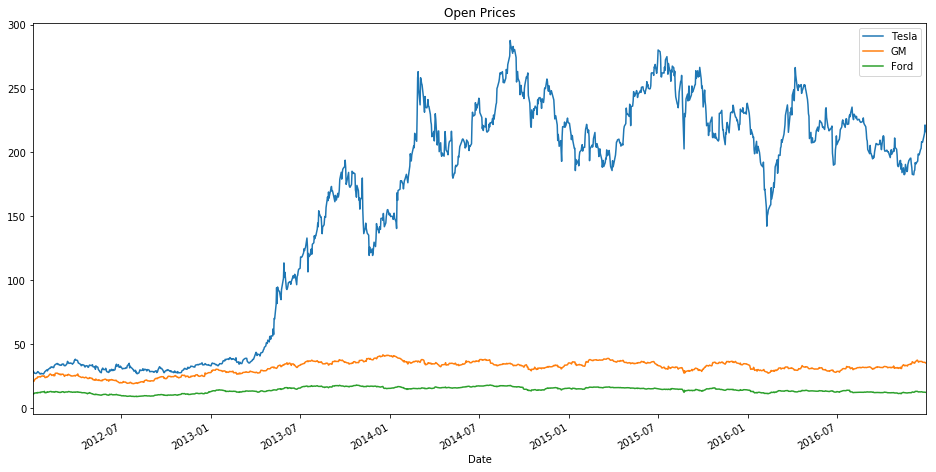

In [173]:
tesla['Open'].plot(label='Tesla', figsize=(16,8))
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.title("Open Prices")

plt.legend();

### Volume of stock traded each day.

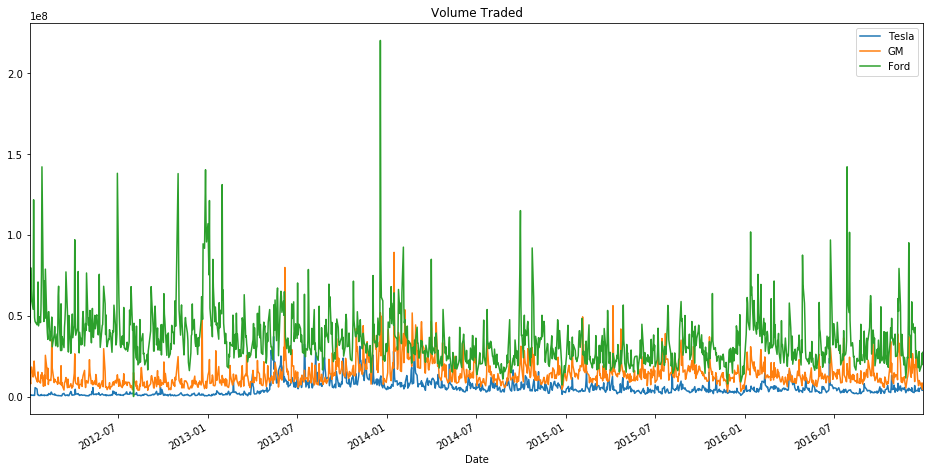

In [174]:
tesla['Volume'].plot(label='Tesla', figsize=(16,8))
gm['Volume'].plot(label='GM')
ford['Volume'].plot(label='Ford')

plt.title("Volume Traded")
plt.legend();

Inference:
It looks like Ford had a massive spike of trading somewhere around late 2013. 

In [175]:
# The date when the highest volume of Trading of Ford Stocks was done.
ford['Volume'].idxmax()

# 18th Dec-13

Timestamp('2013-12-18 00:00:00')

## Story behind the huge trade amount.
Ford announced that the cost of launching products would cut into the profits. This news led to huge amount of selloffs.

(735203.0, 735264.0)

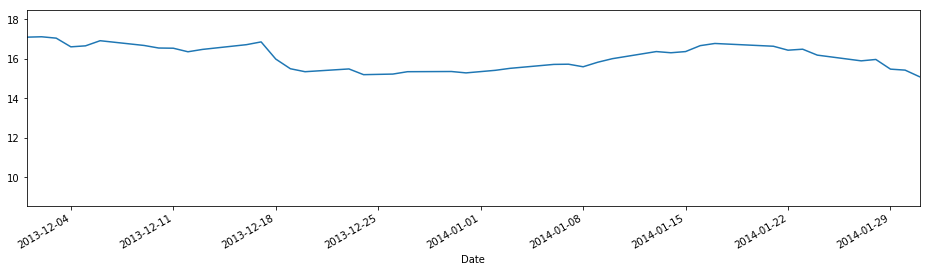

In [176]:
ford['Open'].plot(figsize = (16,4))
plt.xlim(['2013-12-01','2014-01-31'])

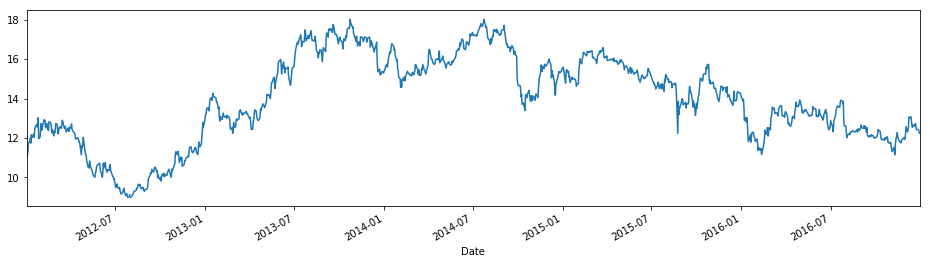

In [177]:
ford['Open'].plot(figsize = (16,4))

It can be seen that there is a slight dip in Opening Price

In [178]:
tesla['Total_Traded'] = tesla['Open'] *  tesla['Volume']
#tesla.drop(columns=['Total_Traded($)'], inplace=True)  # -> This was done, as I had accidently names the column wrongly.
tesla.head()

,Open,High,Low,Close,Volume,Total_Traded
Date,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00


In [179]:
gm['Total_Traded'] = gm['Open'] *  gm['Volume']
gm.head()

,Open,High,Low,Close,Volume,Total_Traded
Date,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08


In [180]:
ford['Total_Traded'] = ford['Open'] *  ford['Volume']
ford.head()

,Open,High,Low,Close,Volume,Total_Traded
Date,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08


### Visualizing the Total Traded qty.

tesla['Total_Traded'].plot(label = 'Tesla', figsize = (16,8))
gm['Total_Traded'].plot()
ford['Total_Traded'].plot()

plt.legend();

Let us check which date is the biggest spike for Tesla.

In [181]:
tesla['Total_Traded'].idxmax()

Timestamp('2014-02-25 00:00:00')

Thus, on 25th Feb 2014, Tesla saw a huge amount of trading of their stocks.
This was due to a Mogan Stanley analyst giving out a bullish research report to clients that favoured Tesla. 


# Visualization of Moving Averages.
Here we will be plotting Moving Averages of stocks over 50 days and 200 days.

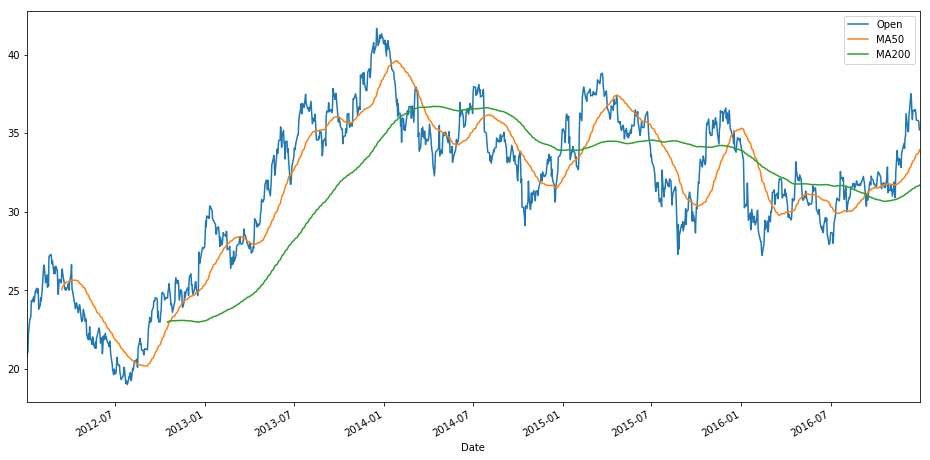

In [182]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8))

Now I will try and see if there is any relationship between those stocks, as they are all related to the Car Industry.
This can be seen by a Scatter Matrix plot.

In [183]:
from pandas.plotting import scatter_matrix

In [184]:
car_comp_df = pd.concat([tesla['Open'], gm['Open'], ford['Open']], axis=1)
car_comp_df.head()
## Rename Columns

#car_comp_df.rename(axis=1, mapper={'Open':'Tesla', 'Open':'GM', 'Open':'Ford'}) 
# This didn't work as every column name was replaced by Ford, as that was the latest name.

,Open,Open,Open
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83


In [185]:
car_comp_df.columns = ['Tesla_Open','GM_Open','Ford_Open']
car_comp_df.head()

,Tesla_Open,GM_Open,Ford_Open
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83


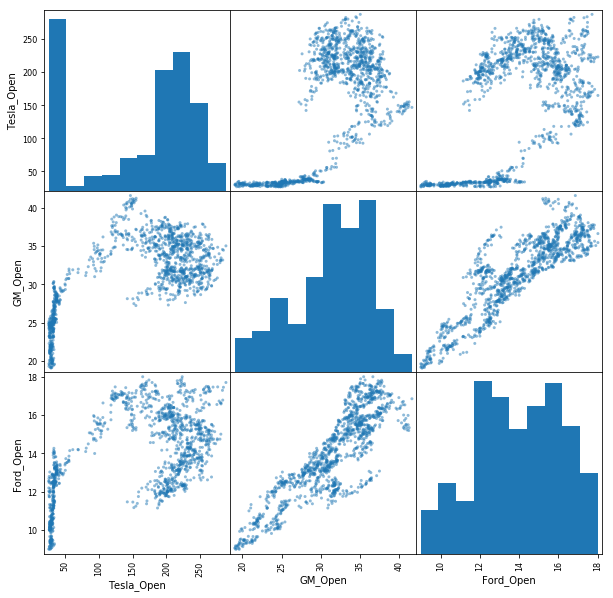

In [186]:
scatter_matrix(car_comp_df, figsize=(10,10));

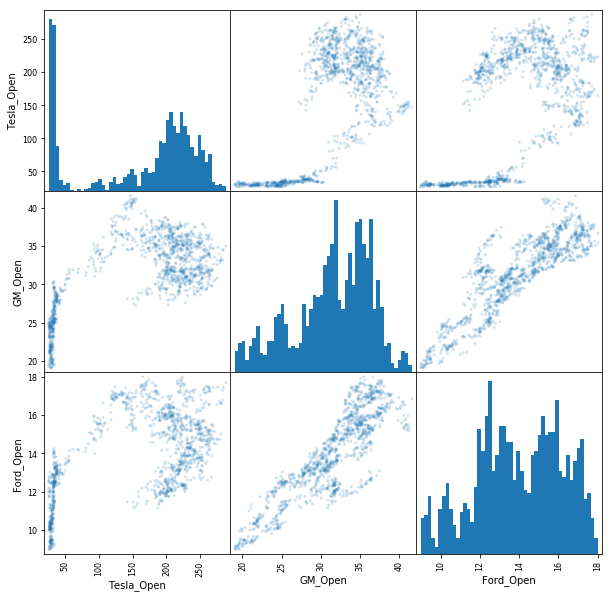

In [187]:
scatter_matrix(car_comp_df, figsize=(10,10), alpha=0.2, hist_kwds={'bins':50} );

# Basic Financial Anaylsis

## Daily Percentage Change
Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

In [188]:
# Create a new Returns column.
#tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1
# Tesla.head()

In [189]:
tesla['Returns'] =  tesla['Close'].pct_change(1)
tesla.head()

,Open,High,Low,Close,Volume,Total_Traded,Returns
Date,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388


In [190]:
ford['Returns'] =  ford['Close'].pct_change(1)
ford.head()

,Open,High,Low,Close,Volume,Total_Traded,Returns
Date,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,0.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,0.025664
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,0.010354
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,0.007686


In [191]:
gm['Returns'] =  gm['Close'].pct_change(1)
gm.head()

,Open,High,Low,Close,Volume,Total_Traded,MA50,MA200,Returns
Date,,,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490


Text(0.5,1,'Ford - Returns')

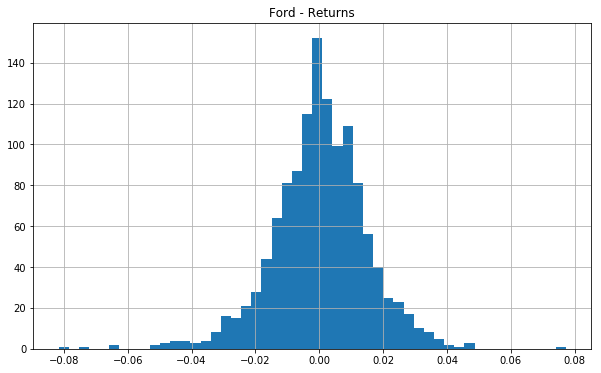

In [192]:
ford['Returns'].hist(bins=50, figsize = (10,6));
plt.title("Ford - Returns")

Text(0.5,1,'General Motor - Returns')

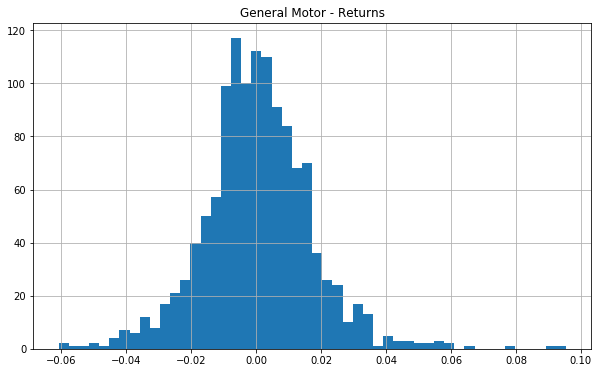

In [193]:
gm['Returns'].hist(bins=50, figsize = (10,6));
plt.title("General Motor - Returns")

Text(0.5,1,'Tesla - Returns')

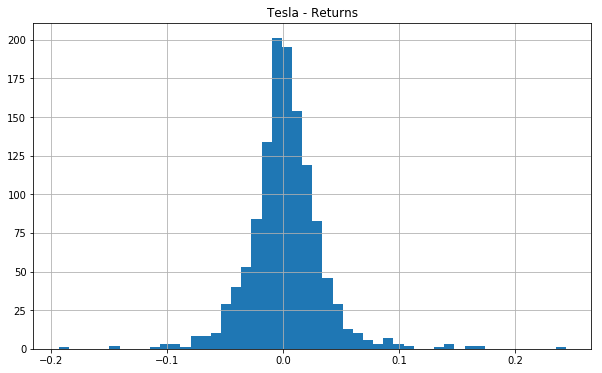

In [194]:
tesla['Returns'].hist(bins=50, figsize = (10,6));
plt.title("Tesla - Returns")

Now to properly compare the histograms, let's stack it on top of each other.

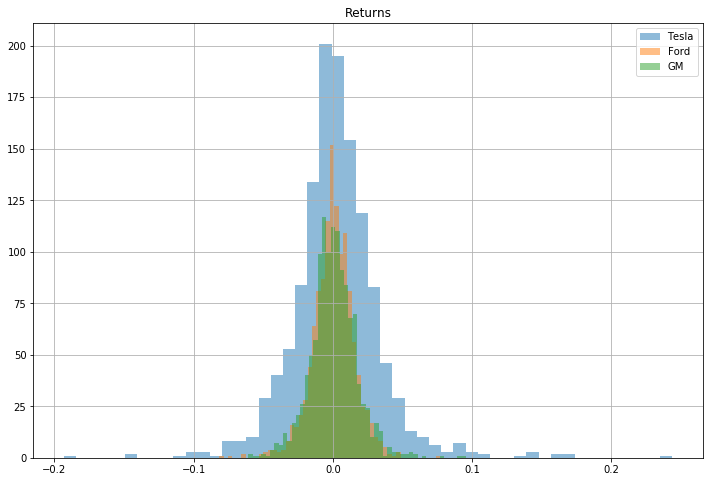

In [195]:
tesla['Returns'].hist(bins=50, figsize = (12,8),label="Tesla", alpha = 0.5)
ford['Returns'].hist(bins=50, figsize = (12,8), label='Ford', alpha = 0.5)
gm['Returns'].hist(bins=50, figsize = (12,8), label="GM", alpha = 0.5)
plt.legend()
plt.title("Returns");

From the above histogram, we can see that Tesla stocks are quite volatile.

### Now I will run a Kernel Density Estimation Plot.

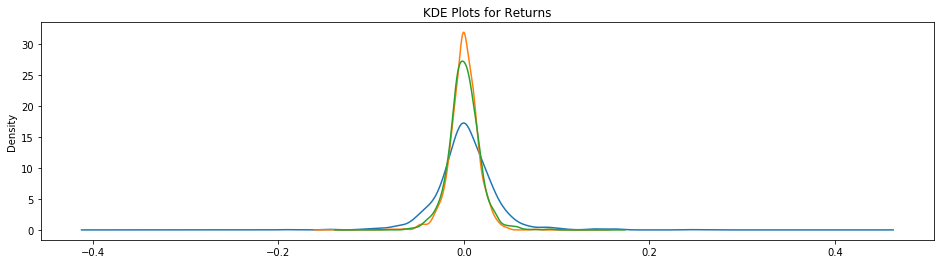

In [196]:
tesla['Returns'].plot(kind='kde', label='Tesla', figsize = (16,4) )
ford['Returns'].plot(kind='kde', label='Ford', figsize = (16,4))
gm['Returns'].plot(kind='kde', label='GM', figsize = (16,4))
plt.title("KDE Plots for Returns")
plt.legend;

## Boxplots
Now the stocks are compared using boxplots.

In [197]:
box_df = pd.concat(objs=[tesla['Returns'], gm['Returns'], ford['Returns']], axis=1)
box_df.columns= ('Tesla', 'Ford','GM')
box_df.head()

,Tesla,Ford,GM
Date,,,
2012-01-03,NaN,NaN,NaN
2012-01-04,-0.013177,0.004751,0.015274
2012-01-05,-0.021292,0.048227,0.025664
2012-01-06,-0.008481,0.033829,0.010354
2012-01-09,0.013388,-0.003490,0.007686


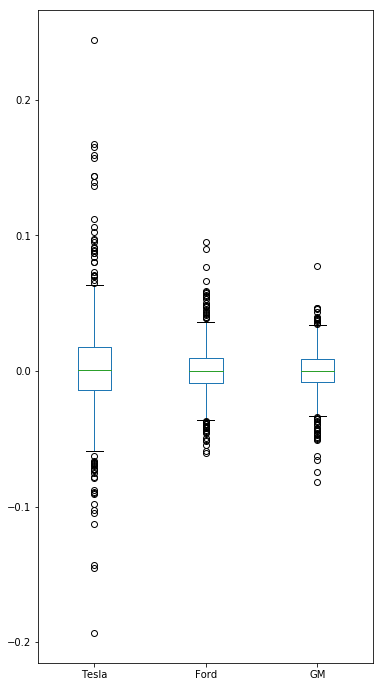

In [198]:
box_df.boxplot(figsize=(6,12), grid=False)

## Studying Correlation between Daily Returns using a Scatter Matrix.

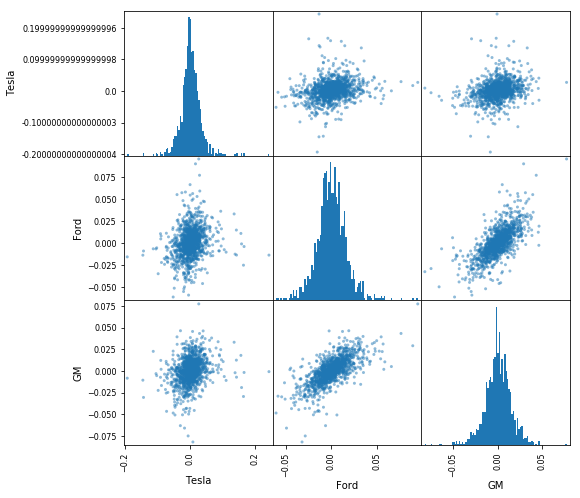

In [199]:
scatter_matrix(box_df, figsize=(8,8), alpha=0.5, hist_kwds={'bins':100});

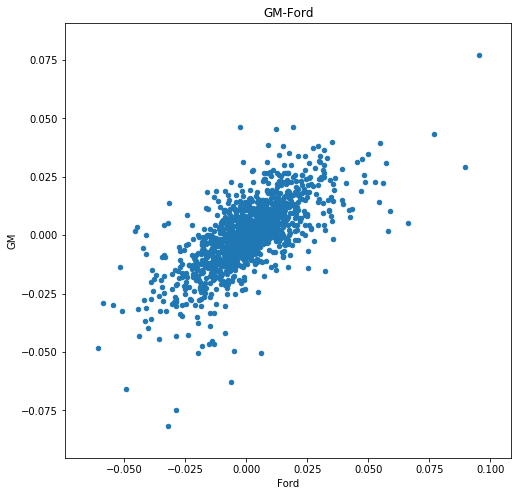

In [200]:
#box_df.columns
box_df.plot(kind='scatter', x='Ford', y='GM',figsize=(8,8), title="GM-Ford");

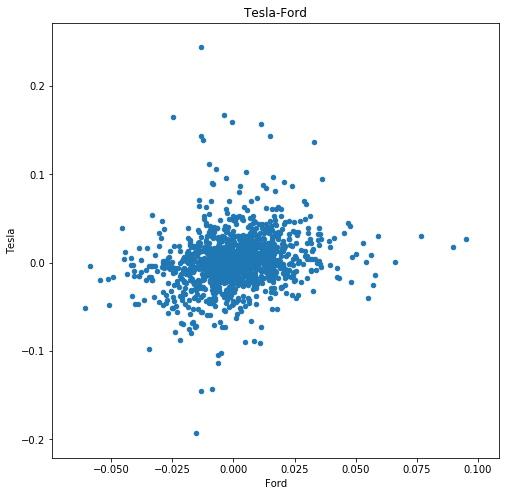

In [201]:
box_df.plot(kind='scatter', x='Ford', y='Tesla',figsize=(8,8), title="Tesla-Ford");

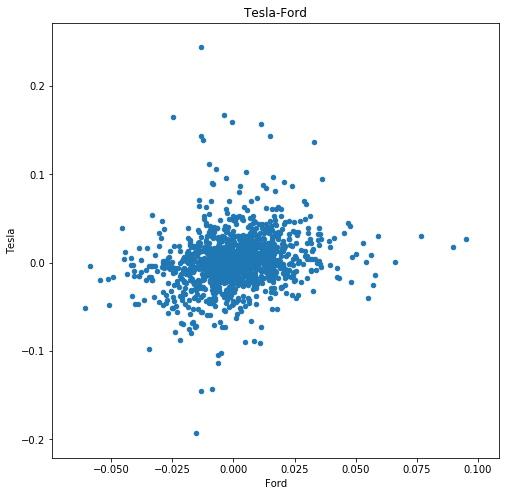

In [202]:
box_df.plot(kind='scatter', x='Ford', y='Tesla',figsize=(8,8), title="Tesla-Ford");

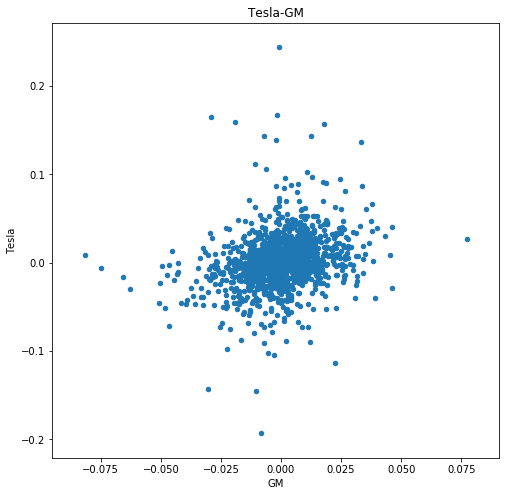

In [203]:
box_df.plot(kind='scatter', x='GM', y='Tesla',figsize=(8,8), title='Tesla-GM');

# Cumulative Returns

It is defined as the aggregrate amount an investment has lost or gained over time, indpendent of the period of time involved.
* Different from stock price at the current day.
* Takes in the account of the daily returns the stock gives to the investor.


## Formula for cumulative return:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

In [204]:
# Creating New columns for Cumulative Daily Return:
tesla['Cm_d_ret'] = (1 + tesla['Returns']).cumprod()
tesla.head()

,Open,High,Low,Close,Volume,Total_Traded,Returns,Cm_d_ret
Date,,,,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88,NaN,NaN
2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56,-0.013177,0.986823
2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32,-0.021292,0.965812
2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20,-0.008481,0.957621
2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00,0.013388,0.970442


In [205]:
# Creating New columns for Cumulative Daily Return:
ford['Cm_d_ret'] = (1 + ford['Returns']).cumprod()
ford.head()

,Open,High,Low,Close,Volume,Total_Traded,Returns,Cm_d_ret
Date,,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811,5.028079e+08,NaN,NaN
2012-01-04,11.15,11.53,11.07,11.30,79725188,8.889358e+08,0.015274,1.015274
2012-01-05,11.33,11.63,11.24,11.59,67877467,7.690517e+08,0.025664,1.041330
2012-01-06,11.74,11.80,11.52,11.71,59840605,7.025287e+08,0.010354,1.052111
2012-01-09,11.83,11.95,11.70,11.80,53981467,6.386008e+08,0.007686,1.060198


In [206]:
#gm.drop(['MA50', 'MA200'], axis=1, inplace=True)
# Creating New columns for Cumulative Daily Return:
gm['Cm_d_ret'] = (1 + gm['Returns']).cumprod()
gm.head()

,Open,High,Low,Close,Volume,Total_Traded,MA50,MA200,Returns,Cm_d_ret
Date,,,,,,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420,1.941652e+08,NaN,NaN,NaN,NaN
2012-01-04,21.05,21.37,20.75,21.15,7856752,1.653846e+08,NaN,NaN,0.004751,1.004751
2012-01-05,21.10,22.29,20.96,22.17,17884040,3.773532e+08,NaN,NaN,0.048227,1.053207
2012-01-06,22.26,23.03,22.24,22.92,18234608,4.059024e+08,NaN,NaN,0.033829,1.088836
2012-01-09,23.20,23.43,22.70,22.84,12091714,2.805278e+08,NaN,NaN,-0.003490,1.085036


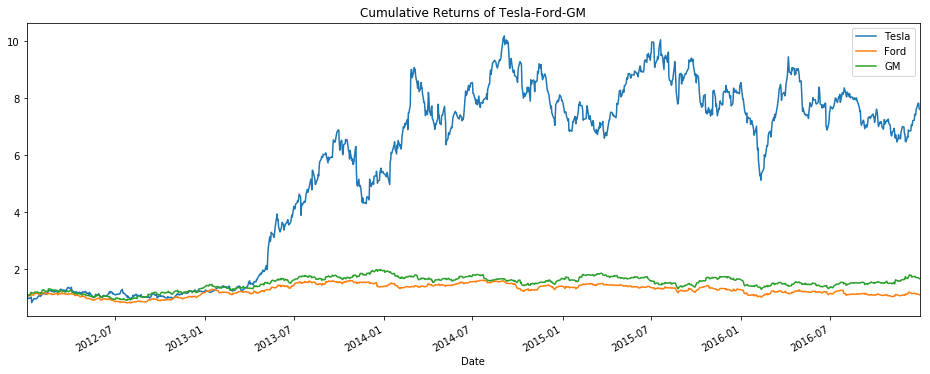

In [207]:
tesla['Cm_d_ret'].plot(label = 'Tesla', figsize=(16,6))
ford['Cm_d_ret'].plot(label = 'Ford', figsize=(16,6))
gm['Cm_d_ret'].plot(label = 'GM', figsize=(16,6))
plt.title("Cumulative Returns of Tesla-Ford-GM")
plt.legend();

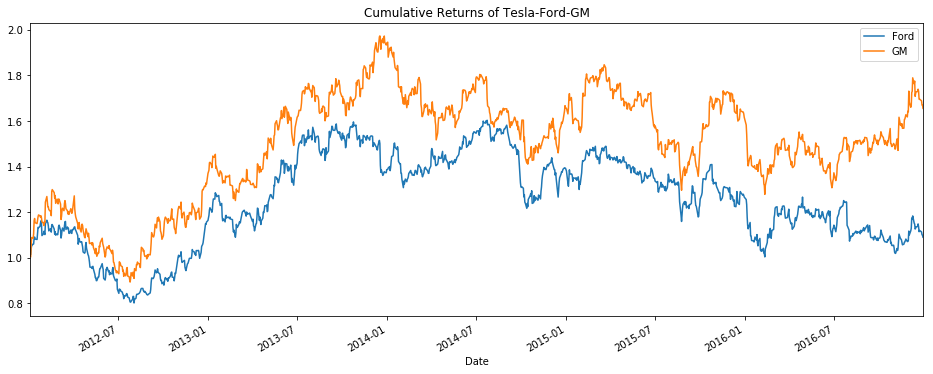

In [208]:
ford['Cm_d_ret'].plot(label = 'Ford', figsize=(16,6))
gm['Cm_d_ret'].plot(label = 'GM', figsize=(16,6))
plt.title("Cumulative Returns of Tesla-Ford-GM")
plt.legend();

# **********************End of Project**************************